<a href="https://colab.research.google.com/github/HaidyMohamedAnter/Ai-Platforms--Building-a-Custom-Neural-Network-Computational-Graph-in-PyTorch-/blob/main/Assignment1_2305309_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Name:Haidy Mohamed Anter
#student id:2305309

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

In [64]:
#NetworkInGraph
class NeuralNet(nn.Module):
    def __init__(self):

        super(NeuralNet, self).__init__()
        self.w00 = torch.randn(1, requires_grad=True)
        self.b00 = torch.randn(1, requires_grad=True)
        self.w01 = torch.randn(1, requires_grad=True)
        self.b01 = torch.randn(1, requires_grad=True)
        self.w02 = torch.randn(1, requires_grad=True)
        self.b02 = torch.randn(1, requires_grad=True)

# Sigmoid
        self.w10 = torch.randn(1, requires_grad=True)
        self.b10 = torch.randn(1, requires_grad=True)

        self.w11 = torch.randn(1, requires_grad=True)
        self.b11 = torch.randn(1, requires_grad=True)

#linear out
        self.w20 = torch.randn(1, requires_grad=True)
        self.b20 = torch.randn(1, requires_grad=True)
# Forward Pass Manual
    def forward(self, x):
#L1
        z00 = self.w00 * x + self.b00
        z01 = self.w01 * x + self.b01
        z02 = self.w02 * x + self.b02
        layer1_out = torch.relu(torch.stack([z00, z01, z02]))
        print("Layer1 output ReLU:", layer1_out)
#L2
        z10 = self.w10 * x + self.b10
        z11 = self.w11 * x + self.b11
        layer2_out = torch.sigmoid(torch.stack([z10, z11]))
        print("Layer2 output Sigmoid:", layer2_out)

#Combine
        combined = layer1_out.sum() + layer2_out.sum()
        combined_tanh = torch.tanh(combined)
        print("Combined after Tanh:", combined_tanh)

#Out Layer
        final_out = self.w20 * combined_tanh + self.b20
        print("Output Linear:", final_out)
        return final_out


In [65]:
#createModel
model = NeuralNet()

In [66]:
#The gradient track with tensorr
x = torch.tensor([1.0], requires_grad=True)

In [67]:
#FrowardPass
output = model(x)

Layer1 output ReLU: tensor([[0.9622],
        [0.0000],
        [0.0000]], grad_fn=<ReluBackward0>)
Layer2 output Sigmoid: tensor([[0.3946],
        [0.5587]], grad_fn=<SigmoidBackward0>)
Combined after Tanh: tensor(0.9575, grad_fn=<TanhBackward0>)
Output Linear: tensor([0.8359], grad_fn=<AddBackward0>)


In [68]:
#BackWard
output.backward()

In [69]:
print("Gradients of each parameter")
print("Gradient of input x:", x.grad)
print("w00:", model.w00.grad)
print("b00:", model.b00.grad)
print("w01:", model.w01.grad)
print("b01:", model.b01.grad)
print("w02:", model.w02.grad)
print("b02:", model.b02.grad)
print("w10:", model.w10.grad)
print("b10:", model.b10.grad)
print("w11:", model.w11.grad)
print("b11:", model.b11.grad)
print("w20:", model.w20.grad)
print("b20:", model.b20.grad)

Gradients of each parameter
Gradient of input x: tensor([0.0102])
w00: tensor([0.0232])
b00: tensor([0.0232])
w01: tensor([0.])
b01: tensor([0.])
w02: tensor([0.])
b02: tensor([0.])
w10: tensor([0.0056])
b10: tensor([0.0056])
w11: tensor([0.0057])
b11: tensor([0.0057])
w20: tensor([0.9575])
b20: tensor([1.])


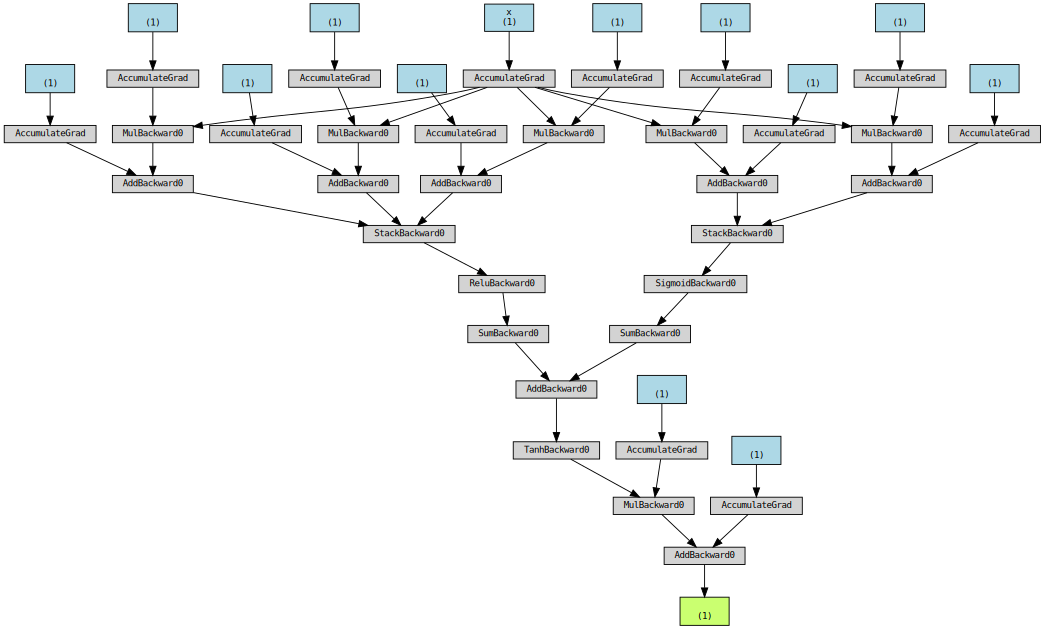

In [70]:
#TOShowTheComputationalGraph
graph = make_dot(output, params={"x": x, **dict(model.named_parameters())})
graph.render("neural_net_graph", format="png")  # Saves it as image
graph